## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
%sh 
python -m nltk.downloader all

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
 warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data] | 
[nltk_data] | Downloading package abc to /root/nltk_data...
[nltk_data] | Unzipping corpora/abc.zip.
[nltk_data] | Downloading package alpino to /root/nltk_data...
[nltk_data] | Unzipping corpora/alpino.zip.
[nltk_data] | Downloading package biocreative_ppi to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/biocreative_ppi.zip.
[nltk_data] | Downloading package brown to /root/nltk_data...
[nltk_data] | Unzipping corpora/brown.zip.
[nltk_data] | Downloading package brown_tei to /root/nltk_data...
[nltk_data] | Unzipping corpora/brown_tei.zip.
[nltk_data] | Downloading package cess_cat to /root/nltk_data...
[nltk_data] | Unzipping corpora/cess_cat.zip.
[nltk_data] | Downloading package cess_esp to /root/nltk_data...
[nltk_data] | Unzipping corpora/cess_esp.zip.
[nltk_data] | Downloading package chat80 to /root/nltk_data...
[nltk_data] | Unzipping corpora/chat80.zip.
[nltk_data] | Downloading package city_database to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/city_database.zip.
[nltk_data] | Downloading package cmudict to /root/nltk_data...
[nltk_data] | Unzipping corpora/cmudict.zip.
[nltk_data] | Downloading package comparative_sentences to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/comparative_sentences.zip.
[nltk_data] | Downloading package comtrans to /root/nltk_data...
[nltk_data] | Downloading package conll2000 to /root/nltk_data...
[nltk_data] | Unzipping corpora/conll2000.zip.
[nltk_data] | Downloading package conll2002 to /root/nltk_data...
[nltk_data] | Unzipping corpora/conll2002.zip.
[nltk_data] | Downloading package conll2007 to /root/nltk_data...
[nltk_data] | Downloading package crubadan to /root/nltk_data...
[nltk_data] | Unzipping corpora/crubadan.zip.
[nltk_data] | Downloading package dependency_treebank to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/dependency_treebank.zip.
[nltk_data] | Downloading package dolch to /root/nltk_data...
[nltk_data] | Unzipping corpora/dolch.zip.
[nltk_data] | Downloading package europarl_raw to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/europarl_raw.zip.
[nltk_data] | Downloading package floresta to /root/nltk_data...
[nltk_data] | Unzipping corpora/floresta.zip.
[nltk_data] | Downloading package framenet_v15 to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/framenet_v15.zip.
[nltk_data] | Downloading package framenet_v17 to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/framenet_v17.zip.
[nltk_data] | Downloading package gazetteers to /root/nltk_data...
[nltk_data] | Unzipping corpora/gazetteers.zip.
[nltk_data] | Downloading package genesis to /root/nltk_data...
[nltk_data] | Unzipping corpora/genesis.zip.
[nltk_data] | Downloading package gutenberg to /root/nltk_data...
[nltk_data] | Unzipping corpora/gutenberg.zip.
[nltk_data] | Downloading package ieer to /root/nltk_data...
[nltk_data] | Unzipping corpora/ieer.zip.
[nltk_data] | Downloading package inaugural to /root/nltk_data...
[nltk_data] | Unzipping corpora/inaugural.zip.
[nltk_data] | Downloading package indian to /root/nltk_data...
[nltk_data] | Unzipping corpora/indian.zip.
[nltk_data] | Downloading package jeita to /root/nltk_data...
[nltk_data] | Downloading package kimmo to /root/nltk_data...
[nltk_data] | Unzipping corpora/kimmo.zip.
[nltk_data] | Downloading package knbc to /root/nltk_data...
[nltk_data] | Downloading package lin_thesaurus to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/lin_thesaurus.zip.
[nltk_data] | Downloading package mac_morpho to /root/nltk_data...
[nltk_data] | Unzipping corpora/mac_morpho.zip.
[nltk_data] | Downloading package machado to /root/n

In [0]:
%matplotlib inline
# If difficulty in import sc or SparkContext Manually
# Please uncomment the following to do so
#import pyspark
#sc = pyspark.SparkContext('local[*]')

from pyspark.mllib.feature import HashingTF
from pyspark.mllib.feature import IDF
from pyspark.mllib.classification import NaiveBayes, NaiveBayesModel
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.classification import LogisticRegressionWithSGD, LogisticRegressionModel
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.mllib.feature import ChiSqSelector
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import os, tempfile
import csv
import string
import random


import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
import sparknlp
sparknlp.version() #This is from JohnSnowLab

Out[2]: '2.4.0'

In [0]:
# File location and type
file_location = "/FileStore/tables/music.json"
file_type = "json"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
reviews = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(reviews)

asin helpful overall reviewText reviewTime reviewerID reviewerName summary unixReviewTime 1384719342 List(0, 0) 5.0 Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing, 02 28, 2014 A2IBPI20UZIR0U cassandra tu "Yeah, well, that's just like, u... good 1393545600 1384719342 List(13, 14) 5.0 The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :] 03 16, 2013 A14VAT5EAX3D9S Jake Jake 1363392000 1384719342 List(1, 1) 5.0 The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequencies. The double cloth filter blocks the pops and lets the voice through with no coloration. The metal clamp mount attaches to the mike stand secure enough to keep it attached. The goose neck needs a little coaxing to stay where you put it. 08 28, 2013 A195EZSQDW3E21 Rick Bennette "Rick Bennette" It Does The Job Well 1377648000 1384719342 List(0, 0) 5.0 Nice windscreen protects my MXL mic and prevents pops. Only thing is that the gooseneck is only marginally able to hold the screen in position and requires careful positioning of the clamp to avoid sagging. 02 14, 2014 A2C00NNG1ZQQG2 RustyBill "Sunday Rocker" GOOD WINDSCREEN FOR THE MONEY 1392336000 1384719342 List(0, 0) 5.0 This pop filter is great. It looks and performs like a studio filter. If you're recording vocals this will eliminate the pops that gets recorded when you sing. 02 21, 2014 A94QU4C90B1AX SEAN MASLANKA No more pops when I record my vocals. 1392940800 B00004Y2UT List(0, 0) 5.0 So good that I bought another one. Love the heavy cord and gold connectors. Bass sounds great. I just learned last night how to coil them up. I guess I should read instructions more carefully. But no harm done, still works great! 12 21, 2012 A2A039TZMZHH9Y Bill Lewey "blewey" The Best Cable 1356048000 B00004Y2UT List(0, 0) 5.0 I have used monster cables for years, and with good reason. The lifetime warranty is worth the price alone. Simple fact: cables break, but getting to replace them at no cost is where it's at. 01 19, 2014 A1UPZM995ZAH90 Brian Monster Standard 100 - 21' Instrument Cable 1390089600 B00004Y2UT List(0, 0) 3.0 I now use this cable to run from the output of my pedal chain to the input of my Fender Amp. After I bought Monster Cable to hook up my pedal board I thought I would try another one and update my guitar. I had been using a high end Planet Waves cable that I bought in the 1980's... Once I found out the input jacks on the new Monster cable didn't fit into the Fender Strat jack I was a little disappointed... I didn't return it and as stated I use it for the output on the pedal board. Save your money... I went back to my Planet Waves Cable...I payed $30.00 back in the eighties for the Planet Waves which now comes in at around $50.00. What I'm getting at is you get what you pay for. I thought Waves was a lot of money back in the day...but I haven't bought a guitar cable since this one...20 plus years and still working...Planet Waves wins. 11 16, 2012 AJNFQI3YR6XJ5 Fender Guy "Rick" Didn't fit my 1996 Fender Strat... 1353024000 B00004Y2UT List(0, 0) 5.0 Perfect for my Epiphone Sheraton II. Monster cables are well constructed. I have several and never had any problems with any 

In [0]:
# Create a view or table

temp_table_name = "reviews"
reviews.createOrReplaceTempView(temp_table_name)

In [0]:
%sql

/* Query the created temp table in a SQL cell */

select reviewText, overall from `reviews`

reviewText overall Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing, 5.0 The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :] 5.0 The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequencies. The double cloth filter blocks the pops and lets the voice through with no coloration. The metal clamp mount attaches to the mike stand secure enough to keep it attached. The goose neck needs a little coaxing to stay where you put it. 5.0 Nice windscreen protects my MXL mic and prevents pops. Only thing is that the gooseneck is only marginally able to hold the screen in position and requires careful positioning of the clamp to avoid sagging. 5.0 This pop filter is great. It looks and performs like a studio filter. If you're recording vocals this will eliminate the pops that gets recorded when you sing. 5.0 So good that I bought another one. Love the heavy cord and gold connectors. Bass sounds great. I just learned last night how to coil them up. I guess I should read instructions more carefully. But no harm done, still works great! 5.0 I have used monster cables for years, and with good reason. The lifetime warranty is worth the price alone. Simple fact: cables break, but getting to replace them at no cost is where it's at. 5.0 I now use this cable to run from the output of my pedal chain to the input of my Fender Amp. After I bought Monster Cable to hook up my pedal board I thought I would try another one and update my guitar. I had been using a high end Planet Waves cable that I bought in the 1980's... Once I found out the input jacks on the new Monster cable didn't fit into the Fender Strat jack I was a little disappointed... I didn't return it and as stated I use it for the output on the pedal board. Save your money... I went back to my Planet Waves Cable...I payed $30.00 back in the eighties for the Planet Waves which now comes in at around $50.00. What I'm getting at is you get what you pay for. I thought Waves was a lot of money back in the day...but I haven't bought a guitar cable since this one...20 plus years and still working...Planet Waves wins. 3.0 Perfect for my Epiphone Sheraton II. Monster cables are well constructed. I have several and never had any problems with any of them over the years. Got this one because I wanted the 90 degree plug. 5.0 Monster makes the best cables and a lifetime warranty doesnt hurt either. This isnt their top of the line series but it works great with my bass guitar rig and has for some time. You cant go wrong with Monster Cables. 5.0 Monster makes a wide array of cables, including some that are very high end. I initially purchased a pair ofMonster Rock Instrument Cable - 21 Feet - Angled to Straight 1/4-Inch plugto use with my keyboards, but when it came time to purchase cables for my bass and guitar I thought I'd pinch a few pennies. I am so glad I did.I compared this cable model to the more expensive models I previously purchased and, aside from looks, could not detect any difference in sound. I Swapped back and forth between my guitars and keyboards, ensuring that each model was used on each instrument - still no difference.What the more expensive model has

In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "music_json"

# reviews.write.format("parquet").saveAsTable(permanent_table_name)

In [0]:
reviews.printSchema()

root
-- asin: string (nullable = true)
-- helpful: array (nullable = true)
 |-- element: long (containsNull = true)
-- overall: double (nullable = true)
-- reviewText: string (nullable = true)
-- reviewTime: string (nullable = true)
-- reviewerID: string (nullable = true)
-- reviewerName: string (nullable = true)
-- summary: string (nullable = true)
-- unixReviewTime: long (nullable = true)

Filter out null reviews

In [0]:
reviews = reviews.filter(reviews.reviewText.isNotNull())

reviews.createOrReplaceTempView('reviews'): Creates a new temporary view using a SparkDataFrame in the Spark Session. If a temporary view with the same name already exists, replaces it.

In [0]:
reviews.createOrReplaceTempView('reviews')

In [0]:
spark.sql('SELECT COUNT(*) FROM reviews').toPandas()

count(1) 
 
 
 
 
 0 
 10261

In [0]:
spark.sql('SELECT * FROM reviews LIMIT 2').toPandas()

asin 
 helpful 
 overall 
 reviewText 
 reviewTime 
 reviewerID 
 reviewerName 
 summary 
 unixReviewTime 
 
 
 
 
 0 
 1384719342 
 [0, 0] 
 5.0 
 Not much to write about here, but it does exac... 
 02 28, 2014 
 A2IBPI20UZIR0U 
 cassandra tu "Yeah, well, that's just like, u... 
 good 
 1393545600 
 
 
 1 
 1384719342 
 [13, 14] 
 5.0 
 The product does exactly as it should and is q... 
 03 16, 2013 
 A14VAT5EAX3D9S 
 Jake 
 Jake 
 1363392000

See who has posted the most reviews

In [0]:
query = '''
SELECT reviewerName, reviewerID, COUNT(*) as num_reviews
FROM reviews
GROUP BY reviewerID, reviewerName
ORDER BY num_reviews DESC
'''
spark.sql(query).show(truncate=50)

+-------------------------------+--------------+-----------+
 reviewerName| reviewerID|num_reviews|
+-------------------------------+--------------+-----------+
 StormJH1| ADH0O8UVJOT10| 42|
 David G|A1L7M2JXN4EZCR| 38|
 David W "Dave"|A15TYOEWBQYF0X| 38|
 Charlo|A2EZWZ8MBEDOLN| 36|
 Mike Tarrani "Jazz Drummer"|A2NYK9KWFMJV4Y| 34|
guitfiddleblue "guitfiddleblue"|A1SD1C8XK3Z3V1| 32|
 Captn' Bob|A1MVH1WLYDHZ49| 32|
 MetalFan|A1GMWTGXW682GB| 29|
 Dako "Dako"|A34O0KQV4QXWNQ| 28|
 David Burch|A1LQC225SE8UNI| 27|
 AF "Whigs"|A22Z554ZQ8NFPC| 25|
 aceofbase| AJK15Q9JOEHRH| 25|
 grandpa "Randy"|A1DVUFG2QSJ6IK| 24|
 G. Thomas "Tom"|A3M1PLEYNDEYO8| 24|
 R. W. Milyard "GearJunky"| AKYDGCKCY7H9F| 23|
 StudioDude| A2F92AOWTIUIB| 23|
 Michael Livote "dragon2knight"| A781ITP3HE2N5| 22|
 JPfromOH|A1YP96MT6W9FTB| 21|
 Richard "Richard"|A3UXW18DP4WSD6| 21|
 Samuel Chell| A6FIAB28IS79| 21|
+-------------------------------+--------------+-----------+
only showing top 20 rows

Number of reviews over time

Obviously as Amazon became more popular, the number of reviews grew

In [0]:
spark.sql('SELECT MIN(YEAR(FROM_UNIXTIME(unixReviewTime))) AS min_year FROM reviews').toPandas()

min_year 
 
 
 
 
 0 
 2004

In [0]:
spark.sql('SELECT MAX(YEAR(FROM_UNIXTIME(unixReviewTime))) AS max_year FROM reviews').toPandas()

max_year 
 
 
 
 
 0 
 2014

In [0]:
query = '''
SELECT COUNT(*) as num_reviews_per_year, YEAR(FROM_UNIXTIME(unixReviewTime)) AS year 
FROM reviews 
GROUP BY year 
ORDER BY year DESC
'''

spark.sql(query).toPandas()

num_reviews_per_year 
 year 
 
 
 
 
 0 
 2679 
 2014 
 
 
 1 
 4055 
 2013 
 
 
 2 
 1936 
 2012 
 
 
 3 
 1007 
 2011 
 
 
 4 
 350 
 2010 
 
 
 5 
 128 
 2009 
 
 
 6 
 63 
 2008 
 
 
 7 
 22 
 2007 
 
 
 8 
 10 
 2006 
 
 
 9 
 4 
 2005 
 
 
 10 
 7 
 2004

In [0]:
spark.sql('SELECT YEAR(FROM_UNIXTIME(unixReviewTime)) AS year FROM reviews').toPandas().hist();

It seems most reviews are actually 5 stars!

In [0]:
spark.sql('SELECT overall AS rating FROM reviews').toPandas().hist();

### Show products with the most reviews

TODO: Need to pull out all products that appear in the reviews from product metadata.

In [0]:
query = '''
SELECT asin, COUNT(*) as num_reviews
FROM reviews
GROUP BY asin
ORDER BY num_reviews DESC
'''
spark.sql(query).show(truncate=50)

+----------+-----------+
 asin|num_reviews|
+----------+-----------+
B003VWJ2K8| 163|
B0002E1G5C| 143|
B0002F7K7Y| 116|
B003VWKPHC| 114|
B0002H0A3S| 93|
B0002CZVXM| 74|
B0006NDF8A| 71|
B0009G1E0K| 69|
B0002E2KPC| 68|
B0002GLDQM| 67|
B004XNK7AI| 65|
B005FKF1PY| 63|
B00646MZHK| 62|
B0002GMGYA| 58|
B001PGXHX0| 58|
B0018TIADQ| 57|
B000978D58| 57|
B0002D0CEO| 55|
B001PGXKC8| 55|
B000068NW5| 52|
+----------+-----------+
only showing top 20 rows

## Bag of Words
- We will use NLTK's list of stopwords to conduct stopword removal, and visualise results in wordclouds
- We will also remove punctuation and capitalization

In [0]:
import re
sw = stopwords.words("english")
def remove_stopwords(x):    
    string = ''
    for x in x.split(' '):
        if x.lower() not in sw:
            string += x + ' '
        else:
            pass
    return string

def lower(text):
  return text.lower()
  
def removePunctuation(text):
  return re.sub('[^A-Za-z0-9 ]+', '', text)  
  
# UDF = user defined function
nosw = udf(remove_stopwords)
rp = udf(removePunctuation)
lc = udf(lower)
# Register UDF with Spark
spark.udf.register("nosw", nosw)
spark.udf.register("rp", rp)
spark.udf.register("lc", lc)

# Creates a new column in reviews which contains the review with no stop words
reviews = reviews.withColumn('text_nosw', lc(rp(nosw('reviewText'))))

In [0]:
display(reviews)

asin helpful overall reviewText reviewTime reviewerID reviewerName summary unixReviewTime text_nosw 1384719342 List(0, 0) 5.0 Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing, 02 28, 2014 A2IBPI20UZIR0U cassandra tu "Yeah, well, that's just like, u... good 1393545600 much write here exactly supposed to filters pop sounds recordings much crisp one lowest prices pop filters amazon might well buy it honestly work despite pricing 1384719342 List(13, 14) 5.0 The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :] 03 16, 2013 A14VAT5EAX3D9S Jake Jake 1363392000 product exactly quite affordablei realized double screened arrived even better expectedas added bonus one screens carries small hint smell old grape candy used buy reminiscents sake cannot stop putting pop filter next nose smelling recording dif needed pop filter work well expensive ones may even come pleasing aroma like mine didbuy product 1384719342 List(1, 1) 5.0 The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequencies. The double cloth filter blocks the pops and lets the voice through with no coloration. The metal clamp mount attaches to the mike stand secure enough to keep it attached. The goose neck needs a little coaxing to stay where you put it. 08 28, 2013 A195EZSQDW3E21 Rick Bennette "Rick Bennette" It Does The Job Well 1377648000 primary job device block breath would otherwise produce popping sound allowing voice pass noticeable reduction volume high frequencies double cloth filter blocks pops lets voice coloration metal clamp mount attaches mike stand secure enough keep attached goose neck needs little coaxing stay put it 1384719342 List(0, 0) 5.0 Nice windscreen protects my MXL mic and prevents pops. Only thing is that the gooseneck is only marginally able to hold the screen in position and requires careful positioning of the clamp to avoid sagging. 02 14, 2014 A2C00NNG1ZQQG2 RustyBill "Sunday Rocker" GOOD WINDSCREEN FOR THE MONEY 1392336000 nice windscreen protects mxl mic prevents pops thing gooseneck marginally able hold screen position requires careful positioning clamp avoid sagging 1384719342 List(0, 0) 5.0 This pop filter is great. It looks and performs like a studio filter. If you're recording vocals this will eliminate the pops that gets recorded when you sing. 02 21, 2014 A94QU4C90B1AX SEAN MASLANKA No more pops when I record my vocals. 1392940800 pop filter great looks performs like studio filter recording vocals eliminate pops gets recorded sing B00004Y2UT List(0, 0) 5.0 So good that I bought another one. Love the heavy cord and gold connectors. Bass sounds great. I just learned last night how to coil them up. I guess I should read instructions more carefully. But no harm done, still works great! 12 21, 2012 A2A039TZMZHH9Y Bill Lewey "blewey" The Best Cable 1356048000 good bought another one love heavy cord gold connectors bass sounds great learned last night coil up guess read instructions carefully harm done still works great B00004Y2UT List(0, 0) 5.0 I have used monster cables for years, and with good reason. The lifetime warranty is worth the price alone. Simple fact: cables break, but getting to replace them at

In [0]:
reviews.select('text_nosw').toPandas()

text_nosw 
 
 
 
 
 0 
 much write here exactly supposed to filters po... 
 
 
 1 
 product exactly quite affordablei realized dou... 
 
 
 2 
 primary job device block breath would otherwis... 
 
 
 3 
 nice windscreen protects mxl mic prevents pops... 
 
 
 4 
 pop filter great looks performs like studio fi... 
 
 
 5 
 good bought another one love heavy cord gold ... 
 
 
 6 
 used monster cables years good reason lifetime... 
 
 
 7 
 use cable run output pedal chain input fender ... 
 
 
 8 
 perfect epiphone sheraton ii monster cables w... 
 
 
 9 
 monster makes best cables lifetime warranty do... 
 
 
 10 
 monster makes wide array cables including high... 
 
 
 11 
 got needed it found really need often rarely u... 
 
 
 12 
 use using large sustaining pedal playing piano... 
 
 
 13 
 love it used yamaha ypt230 works great would r... 
 
 
 14 
 bought use home studio control midi keyboard w... 
 
 
 15 
 bought use keyboard really aware options keybo... 
 
 
 16 
 fender cable perfect length me sometimes find ... 
 
 
 17 
 wanted looks aloneit nice looking cord know pe... 
 
 
 18 
 ive using cables 4 months holding pretty well ... 
 
 
 19 
 fender cords look great work well adding word ... 
 
 
 20 
 cool looking cheap cable works well bent one c... 
 
 
 21 
 fender 18 feet california clear instrument cab... 
 
 
 22 
 good cable well made looks great candy apple r... 
 
 
 23 
 got cable run rockband keyboard controller mau... 
 
 
 24 
 searching midi cables art x15 foot controller ... 
 
 
 25 
 cant go wrong great quality budget price hos... 
 
 
 26 
 ends midi cable look feel like quality connect... 
 
 
 27 
 trying find midi midi task make sure pin confi... 
 
 
 28 
 hosa xlr cables affordable heavily madei large... 
 
 
 29 
 bought go board amp use mobile church take bea... 
 
 
 ... 
 ... 
 
 
 10231 
 long time never thought much guitar strings pr... 
 
 
 10232 
 father fulltime gigging musician primarily ste... 
 
 
 10233 
 daddario always one best string manufacturers ... 
 
 
 10234 
 usually use gibson vintage nickle strings elec... 
 
 
 10235 
 excellent tone im bit surprised that mean dad... 
 
 
 10236 
 ive stringing guitars daddario several years ... 
 
 
 10237 
 get wrong improvement old formulation noticeab... 
 
 
 10238 
 nice bright sound easy fingers light action pr... 
 
 
 10239 
 daddarios nyxl1046 nickel plated electric guit... 
 
 
 10240 
 put martin dcx1e sound great big guitar really... 
 
 
 10241 
 ordered husband musician said high quality str... 
 
 
 10242 
 used elixer strings several years 6 12 string ... 
 
 
 10243 
 cant speak claim longer string life strings t... 
 
 
 10244 
 great product nice feel tone im sorry preorder... 
 
 
 10245 
 reviewed strings before frankly impressed tone... 
 
 
 10246 
 opportunity try set elixir nanoweb light gauge... 
 
 
 10247 
 looking forward trying these ive loved company... 
 
 
 10248 
 put strings guild acoustic electric play mainl... 
 
 
 10249 
 ordered husband musician said high quality st... 
 
 
 10250 
 used elixer strings several years 6 12 string ... 
 
 
 10251 
 true phosphor bronze strings mellow full sound... 
 
 
 10252 
 ive used elixirs five years now set offers gre... 
 
 
 10253 
 im daddario man myself hey free free jumped c... 
 
 
 10254 
 really like strings quite bright sounding unc... 
 
 
 10255 
 lots friends play strings love string like me ... 
 
 
 10256 
 great expected thank all 
 
 
 10257 
 ive thinking trying nanoweb strings while bit ... 
 
 
 10258 
 tried coated strings past including elixirs n... 
 
 
 10259 
 well made elixir developed taylor guitars str... 
 
 
 10260 
 strings really quite good call perfect unwoun... 
 
 
 
 10261 rows × 1 columns

In [0]:
def flat_list(column):
    corpus = []
    for row in column:
        for w in row.split(' '):
            corpus.append(w)
    return corpus

def corpus_creator(text_col):
    corpus = text_col.rdd \
                    .flatMap(flat_list) \
                    .map(lambda x: (x, 1)) \
                    .reduceByKey(lambda x, y: x+y ) \
                    .sortBy(lambda x: x[1], ascending=False) \
                    .toDF() \
                    .withColumnRenamed('_1','reviewText') \
                    .withColumnRenamed('_2','count')
    return corpus

def annual_reviews(year):
    annual_reviews = reviews.select('text_nosw') \
                        .filter('YEAR(FROM_UNIXTIME(unixReviewTime))=={}'.format(year)) \
                        .withColumnRenamed('text_nosw','reviewText')
    return annual_reviews

def wordcloud(corpus_sdf):
    corpus_pdf = corpus_sdf.limit(500).toPandas()

    corpus_dict = {}
    for index, row in corpus_pdf.iterrows():
        corpus_dict[row['reviewText']] = row['count']
        
    wordcloud = WordCloud().generate_from_frequencies(corpus_dict)
    plt.imshow(wordcloud);


years_list = [2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004]

annual_corpora = {}
for year in years_list:
    annual_corpora[str(year)] = corpus_creator(annual_reviews(year))

for key,value in annual_corpora.items():
    fig, ax = plt.subplots()
    ax = wordcloud(value)
    fig.suptitle('{} wordcloud'.format(key))

/databricks/python/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 max_open_warning, RuntimeWarning)

## Entity Recognition
- The issue with the Bag of Words approach is that non-descriptive words come to the top, which aren't stopwords.
- We turn to Spark NLP's entity recognition now to filter only on Entities which would better bring popular themes to the surface

In [0]:
from sparknlp.pretrained import PretrainedPipeline

def make_string(x):
    string = ''
    for x in x:
        string += x + ' '
    return string

make_string = udf(make_string)
spark.udf.register("make_string", make_string)

pipeline = PretrainedPipeline('explain_document_dl', 'en')

annual_entities = {}
for year in years_list:
    entities_filtered = pipeline.transform(annual_corpora[str(year)])\
                                .select('reviewText','count',
                                        col('entities.result').alias('entities'),
                                        col('pos.result').alias('pos'))
    entities_filtered = entities_filtered.withColumn('entities',make_string('entities'))\
                                        .withColumn('pos',make_string('pos'))\
                                        .filter('entities <> ""')
    annual_entities[str(year)] = entities_filtered
    
    
for key,value in annual_entities.items():
    fig, ax = plt.subplots()
    ax = wordcloud(value)
    fig.suptitle('{} wordcloud'.format(key))

explain_document_dl download started this may take some time.
Approx size to download 168.4 MB
[ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][OK!]

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 62 try : 
 ---> 63 return f ( * a , ** kw ) 
 64 except py4j . protocol . Py4JJavaError as e : 

 /databricks/spark/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 --> 328 format(target_id, ".", name), value)
 329 else : 

 Py4JJavaError : An error occurred while calling o4339.transform.
: java.lang.IllegalArgumentException: Dataset does not have any 'text' column
	at com.johnsnowlabs.nlp.DocumentAssembler$$anonfun$2.apply(DocumentAssembler.scala:145)
	at com.johnsnowlabs.nlp.DocumentAssembler$$anonfun$2.apply(DocumentAssembler.scala:145)
	at scala.Option.getOrElse(Option.scala:121)
	at com.johnsnowlabs.nlp.DocumentAssembler.transform(DocumentAssembler.scala:145)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:380)
	at py4j.Gateway.invoke(Gateway.java:295)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:251)
	at java.lang.Thread.run(Thread.java:748)


During handling of the above exception, another exception occurred:

 IllegalArgumentException Traceback (most recent call last)
 <command-3869185695909332> in <module> 
 14 annual_entities = { } 
 15 for year in years_list : 
 ---> 16 entities_filtered = pipeline . transform ( annual_corpora [ str ( year ) ] ) \ 
 17 .select('reviewText','count',
 18 col ( 'entities.result' ) . alias ( 'entities' ) , 

 /databricks/python/lib/python3.7/site-packages/sparknlp/pretrained.py in transform (self, data) 
 121 
 122 def transform ( self , data ) : 
 --> 123 return self . model . transform ( data ) 

 /databricks/spark/python/pyspark/ml/base.py in transform (self, dataset, params) 
 171 return self . copy ( params ) . _transform ( dataset ) 
 172 else : 
 --> 173 return self . _transform ( dataset ) 
 174 else : 
 175 raise ValueError ( "Params must be a param map but got %s." % type ( params ) ) 

 /databricks/spark/python/pyspark/ml/pipeline.py in _transform (self, dataset) 
 260 def _transform ( self , dataset ) : 
 261 for t in self . stages : 
 --> 262 dataset = t . transform ( dataset ) 
 263 return dataset
 264 

 /databricks/spark/python/pyspark/ml/base.py in transform (self, dataset, params) 
 171 return self . copy ( params ) . _transform ( dataset ) 
 172 else : 
 --> 173 return self . _transform ( dataset ) 
 174 else : 
 175 raise ValueError ( "Params must be a param map but got %s." % type ( params ) ) 

 /databricks/spark/python/pyspark/ml/wrapper.py in _transform (self, dataset) 
 310 def _transform ( self , dataset ) : 
 311 self . _transfer_params_to_java ( ) 
 --> 312 return DataFrame ( self . _java_obj . transform ( dataset . _jdf ) , dataset . sql_ctx ) 
 313 
 314 

 /databricks/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1255 answer = self . gateway_client . send_command ( command ) 
 1256 return_value = get_return_value(
 -> 1257 answer, self.gateway_client, self.target_id, self.name)
 1258 
 1259 for temp_arg in temp_args : 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 77 raise QueryExecutionException ( s . split ( ': ' , 1 ) [ 1 ] , stackTrace ) 
 78 if s . startswith ( 'java.lang.IllegalArgumentException: ' ) : 
 ---> 79 raise IllegalArgumentException ( s . split ( ': ' , 1 ) [ 1 ] , stac

In [0]:
%python
from pyspark.sql.functions import lit, when, col, regexp_extract
reviewsdf = reviews.withColumn('overall', when(col("overall") > 3, 1).otherwise(0))
reviewsdf = reviewsdf.drop("asin","helpful","reviewText","reviewTime","reviewerID","reviewerName","summary","unixReviewTime")
reviewsdf = reviewsdf.withColumnRenamed("text_nosw","text").withColumnRenamed("overall","sentiment")
display(reviewsdf)

sentiment text 1 much write here exactly supposed to filters pop sounds recordings much crisp one lowest prices pop filters amazon might well buy it honestly work despite pricing 1 product exactly quite affordablei realized double screened arrived even better expectedas added bonus one screens carries small hint smell old grape candy used buy reminiscents sake cannot stop putting pop filter next nose smelling recording dif needed pop filter work well expensive ones may even come pleasing aroma like mine didbuy product 1 primary job device block breath would otherwise produce popping sound allowing voice pass noticeable reduction volume high frequencies double cloth filter blocks pops lets voice coloration metal clamp mount attaches mike stand secure enough keep attached goose neck needs little coaxing stay put it 1 nice windscreen protects mxl mic prevents pops thing gooseneck marginally able hold screen position requires careful positioning clamp avoid sagging 1 pop filter great looks performs like studio filter recording vocals eliminate pops gets recorded sing 1 good bought another one love heavy cord gold connectors bass sounds great learned last night coil up guess read instructions carefully harm done still works great 1 used monster cables years good reason lifetime warranty worth price alone simple fact cables break getting replace cost at 0 use cable run output pedal chain input fender amp bought monster cable hook pedal board thought would try another one update guitar using high end planet waves cable bought 1980s found input jacks new monster cable fit fender strat jack little disappointed return stated use output pedal board save money went back planet waves cablei payed 3000 back eighties planet waves comes around 5000 im getting get pay for thought waves lot money back daybut bought guitar cable since one20 plus years still workingplanet waves wins 1 perfect epiphone sheraton ii monster cables well constructed several never problems years got one wanted 90 degree plug 1 monster makes best cables lifetime warranty doesnt hurt either isnt top line series works great bass guitar rig time cant go wrong monster cables 1 monster makes wide array cables including high end initially purchased pair ofmonster rock instrument cable 21 feet angled straight 14inch plugto use keyboards came time purchase cables bass guitar thought id pinch pennies glad didi compared cable model expensive models previously purchased and aside looks could detect difference sound swapped back forth guitars keyboards ensuring model used instrument still differencewhat expensive model going looks sure the higher priced model even sturdy molded stress relief ends model seem make reliable pricier siblingbottom line carefully compare cables using instrument amp possible making purchase decision may find did higher price necessarily equal higher value even manufacturer 1 got needed it found really need often rarely use it really good see need keyboard organ 0 use using large sustaining pedal playing piano may appear little awkward 1 love it used yamaha ypt230 works great would recommend anyone 1 bought use home studio control midi keyboard wanted do 0 bought use keyboard really aware options keyboard pedals work smoothly pedals acoustic piano id always used feel either nowhere closein opinion sustain pedal like maudio sp2 sustain pedal piano style action similar pedal much better choice price difference dollars feel action much better thing ive found yamaha fc5 sustain pedal good taking space drawer keep electric guitar pedals 1 fender cable perfect length me sometimes find bit long mind build quality great know last gripe cable metal sleeve gets unscrewed way easily requiring tighten oftensound quality affected color cool definitely try cable out 1 wanted looks aloneit nice looking cord know performas sam ash this cord packed mailer inside another box roc n soc shipping team great worknever complaints me love sam ash thanks amazon 1 ive using cables 

In [0]:
%python
#need equal number of negative and positive reviews
reviewsdf.createOrReplaceTempView('reviewsdf')
display(reviewsdf)

sentiment text 1 much write here exactly supposed to filters pop sounds recordings much crisp one lowest prices pop filters amazon might well buy it honestly work despite pricing 1 product exactly quite affordablei realized double screened arrived even better expectedas added bonus one screens carries small hint smell old grape candy used buy reminiscents sake cannot stop putting pop filter next nose smelling recording dif needed pop filter work well expensive ones may even come pleasing aroma like mine didbuy product 1 primary job device block breath would otherwise produce popping sound allowing voice pass noticeable reduction volume high frequencies double cloth filter blocks pops lets voice coloration metal clamp mount attaches mike stand secure enough keep attached goose neck needs little coaxing stay put it 1 nice windscreen protects mxl mic prevents pops thing gooseneck marginally able hold screen position requires careful positioning clamp avoid sagging 1 pop filter great looks performs like studio filter recording vocals eliminate pops gets recorded sing 1 good bought another one love heavy cord gold connectors bass sounds great learned last night coil up guess read instructions carefully harm done still works great 1 used monster cables years good reason lifetime warranty worth price alone simple fact cables break getting replace cost at 0 use cable run output pedal chain input fender amp bought monster cable hook pedal board thought would try another one update guitar using high end planet waves cable bought 1980s found input jacks new monster cable fit fender strat jack little disappointed return stated use output pedal board save money went back planet waves cablei payed 3000 back eighties planet waves comes around 5000 im getting get pay for thought waves lot money back daybut bought guitar cable since one20 plus years still workingplanet waves wins 1 perfect epiphone sheraton ii monster cables well constructed several never problems years got one wanted 90 degree plug 1 monster makes best cables lifetime warranty doesnt hurt either isnt top line series works great bass guitar rig time cant go wrong monster cables 1 monster makes wide array cables including high end initially purchased pair ofmonster rock instrument cable 21 feet angled straight 14inch plugto use keyboards came time purchase cables bass guitar thought id pinch pennies glad didi compared cable model expensive models previously purchased and aside looks could detect difference sound swapped back forth guitars keyboards ensuring model used instrument still differencewhat expensive model going looks sure the higher priced model even sturdy molded stress relief ends model seem make reliable pricier siblingbottom line carefully compare cables using instrument amp possible making purchase decision may find did higher price necessarily equal higher value even manufacturer 1 got needed it found really need often rarely use it really good see need keyboard organ 0 use using large sustaining pedal playing piano may appear little awkward 1 love it used yamaha ypt230 works great would recommend anyone 1 bought use home studio control midi keyboard wanted do 0 bought use keyboard really aware options keyboard pedals work smoothly pedals acoustic piano id always used feel either nowhere closein opinion sustain pedal like maudio sp2 sustain pedal piano style action similar pedal much better choice price difference dollars feel action much better thing ive found yamaha fc5 sustain pedal good taking space drawer keep electric guitar pedals 1 fender cable perfect length me sometimes find bit long mind build quality great know last gripe cable metal sleeve gets unscrewed way easily requiring tighten oftensound quality affected color cool definitely try cable out 1 wanted looks aloneit nice looking cord know performas sam ash this cord packed mailer inside another box roc n soc shipping team great worknever complaints me love sam ash thanks amazon 1 ive using cables 

In [0]:
query = '''
SELECT *
FROM reviewsdf
'''
spark.sql(query).show()

+---------+--------------------+
sentiment| text|
+---------+--------------------+
 1|much write here e...|
 1|product exactly q...|
 1|primary job devic...|
 1|nice windscreen p...|
 1|pop filter great ...|
 1|good bought anoth...|
 1|used monster cabl...|
 0|use cable run out...|
 1|perfect epiphone ...|
 1|monster makes bes...|
 1|monster makes wid...|
 1|got needed it fou...|
 0|use using large s...|
 1|love it used yama...|
 1|bought use home s...|
 0|bought use keyboa...|
 1|fender cable perf...|
 1|wanted looks alon...|
 1|ive using cables ...|
 1|fender cords look...|
+---------+--------------------+
only showing top 20 rows

In [0]:
query = '''
SELECT COUNT('sentiment')
FROM reviewsdf
WHERE sentiment='1'
'''
poscount = spark.sql(query).show()

+----------------+
count(sentiment)|
+----------------+
 9022|
+----------------+

In [0]:
query = '''
SELECT COUNT('sentiment')
FROM reviewsdf
WHERE sentiment='0'
'''
negcount = spark.sql(query)
n = negcount.first()
n

Out[43]: Row(count(sentiment)=1239)

In [0]:
query = '''
SELECT *
FROM reviewsdf
WHERE sentiment='1'
'''
t = spark.sql(query).show(1239)

+---------+--------------------+
sentiment| text|
+---------+--------------------+
 1|much write here e...|
 1|product exactly q...|
 1|primary job devic...|
 1|nice windscreen p...|
 1|pop filter great ...|
 1|good bought anoth...|
 1|used monster cabl...|
 1|perfect epiphone ...|
 1|monster makes bes...|
 1|monster makes wid...|
 1|got needed it fou...|
 1|love it used yama...|
 1|bought use home s...|
 1|fender cable perf...|
 1|wanted looks alon...|
 1|ive using cables ...|
 1|fender cords look...|
 1|cool looking chea...|
 1|fender 18 feet ca...|
 1|good cable well m...|
 1|got cable run roc...|
 1|searching midi ca...|
 1|cant go wrong gre...|
 1|ends midi cable l...|
 1|trying find midi ...|
 1|hosa xlr cables a...|
 1|bought go board a...|
 1|sturdy cord plugs...|
 1|use every week gi...|
 1|hosa products goo...|
 1|exactly after voi...|
 1|bought really lon...|
 1|cable seems like ...|
 1|greatest theyre c...|
 1|fine cable decent...|
 1|ive used lot cabl...|
 1|bought cord retur...|
 1|nice solid cables...|
 1|good quality cabl...|
 1|zero issues cable...|
 1|realtively inexpe...|
 1|bought wanted che...|
 1|nice cable price ...|
 1|cheap good textur...|
 1|seems sturdy enou...|
 1|im professional p...|
 1|hosa cable well m...|
 1|bought daughter a...|
 1|hard cables typi...|
 1|found hosa cables...|
 1|good cable excell...|
 1|pretty crappy cab...|
 1|use cord church r...|
 1|second hosa guita...|
 1|cables taken beat...|
 1|opinion hurt extr...|
 1|hosa guitar cable...|
 1|product exactly s...|
 1|good quality guit...|
 1|good solid cable ...|
 1|guitar cable nice...|
 1|good product good...|
 1|item well built l...|
 1|amp plug great pr...|
 1|hosa cable gtr210...|
 1|basic black elect...|
 1|hosa cable qualit...|
 1|never really cons...|
 1|price fantasticth...|
 1|hosa makes good s...|
 1|complaint size fa...|
 1|hard day much wor...|
 1|price works reall...|
 1|cable disproves n...|
 1|looking long cabl...|
 1|good cables good ...|
 1|sturdy high quali...|
 1|unless going go t...|
 1|many lengths hosa...|
 1|ive using 3 weeks...|
 1|works great 100 w...|
 1|good cable good e...|
 1|lots hosa cables ...|
 1|cable great conne...|
 1|bought hook beta ...|
 1|received cord see...|
 1|like me probably ...|
 1|well made xlr 3 p...|
 1|listing item conf...|
 1|first reasons awa...|
 1|use cable run ext...|
 1|adapter cable ste...|
 1|well made works s...|
 1|used yet like cab...|
 1|great stereo soun...|
 1|another quality p...|
 1|ordered expecting...|
 1|solid cables tig...|
 1|mixer sendreturns...|
 1|still operate ana...|
 1|use home studio i...|
 1|need audio insert...|
 1|play ipod small g...|
 1|plugged works con...|
 1|bought hook ipods...|
 1|carry bass gig ba...|
 1|is super cheap mo...|
 1|hard love cord ca...|
 1|cables cables usu...|
 1|picked cable test...|
 1|l jack good enoug...|
 1|little patch cabl...|
 1|need 6 cables con...|
 1|bought hosa pedal...|
 1|good little conne...|
 1|great cables con ...|
 1|works fine great ...|
 1|exactly needed co...|
 1|great patch cable...|
 1|cable came super ...|
 1|good cable forsee...|
 1|fanciest cable bu...|
 1|typically use pla...|
 1|really inexpensiv...|
 1|hosa patch cables...|
 1|lower profile fit...|
 1|bought 6 xlr 1434...|
 1|use adapter inter...|
 1|purchased work io...|
 1|come handy many t...|
 1|title says works ...|
 1|converts xlr sign...|
 1|affordable works ...|
 1|price cant beat i...|
 1|basic female xlr ...|
 1|bought xlr splitt...|
 1|expected hosa ano...|
 1|use run single mo...|
 1|think purchasing ...|
 1|solid product end...|
 1|dual splitter wor...|
 1|recommended top e...|
 1|thing like magic ...|
 1|bought product us...|
 1|pay tech fix knob...|
 1|deal quite bit el...|
 1|getting errors pr...|
 1|stuff works great...|
 1|fantastic stuffi ...|
 1|it brillcream dab...|
 1|used guitar tone ...|
 1|use alot kinds el...|
 1|pots bass become ...|
 1|money karaoke mic...|
 1|truly surprised s...|
 1|reason give 4 sta...|
 1|bought mic spare

In [0]:
display(t)

In [0]:

##############################################
#Compute TF

def CompTF(tshuffle_rdd):
    t_rdd=sc.parallelize([row[1] for row in tshuffle_rdd.collect()])
    hashingTF = HashingTF(25000)
    tf = hashingTF.transform(t_rdd)
    return tf

def CompTF_withNumFeatures(tshuffle_rdd):
    t_rdd=sc.parallelize([row[1] for row in tshuffle_rdd.collect()])
    hashingTF = HashingTF(1500)
    tf = hashingTF.transform(t_rdd)
    return tf

##############################################
#Compute IDF

def CompIDF(tf):
    tf.cache()
    idf = IDF().fit(tf)
    return idf

##############################################
#Compute TFIDF

def CompTFIDF(tf,idf):
    tfidf = idf.transform(tf)
    return tfidf

##############################################
#Feature Extraction

def Convert_to_LabeledPoint(labels,features):
    training = labels.zip(features).map(lambda x: LabeledPoint(x[0], x[1]))
    return training

##################################################
#Naive Bayes

#Training - NB
def NB_train(training):
    model = NaiveBayes.train(training)
    return model

###################################################
#Logistic Regression

#Training - LG
def LG_train(training):
    model = LogisticRegressionWithSGD.train(training,regType='l2')
    return model

#########################################
#Decision Trees

#Training - DT
def DT_train(training):
    model = DecisionTree.trainClassifier(training, numClasses=2, categoricalFeaturesInfo={},
                                        impurity='gini', maxDepth=5, maxBins=32)
    return model

############################################
#Testing

def test(model,labels,features):
    labels_and_preds = labels.zip(model.predict(features)).map(
                                lambda x: {"actual": float(x[0]), "predicted": float(x[1])})
    acc=100.0*((labels_and_preds.filter(lambda x:x["actual"]==x["predicted"]).count()) / (labels.count()))
    return acc

##############################################
#Testing with pred prob

def test_wpp(model,labels,features):
    labels_and_probs = labels.zip(model.predict(features)).map(
                                lambda x: {"actual": float(x[0]), "probs": float(x[1])})
    return labels_and_probs
    
#################################
#Final Test

def test_final(model,labels,features):
    labels_and_preds = labels.zip(model.predict(features)).map(
                                lambda x: {"actual": float(x[0]), "predicted": float(x[1])})
    acc=100.0*((labels_and_preds.filter(lambda x:x["actual"]==x["predicted"]).count()) / (labels.count()))
    return (labels_and_preds,acc)

#############################
# tpr and fpr

def tf(labels_and_preds):
    true_pos = (labels_and_preds.filter(lambda x:x["predicted"]==1 and x["actual"]==1).count())
    true_neg = (labels_and_preds.filter(lambda x:x["predicted"]==0 and x["actual"]==0).count())
    false_pos = (labels_and_preds.filter(lambda x:x["predicted"]==1 and x["actual"]==0).count())
    false_neg = (labels_and_preds.filter(lambda x:x["predicted"]==0 and x["actual"]==1).count())

    tpr=(true_pos)/(true_pos+false_neg)
    fpr=(false_pos)/(false_pos+true_neg)
    return (tpr,fpr)

#Retrieving Data

In [0]:
rdd_full = reviewsdf.rdd.map(tuple)
#random.shuffle(train_shuffle)
rdd_test, rdd_train = rdd_full.randomSplit(weights=[0.3, 0.7], seed=1)
p=rdd_train.randomSplit(weights=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], seed=1)
#rdd_test.take(1)

In [0]:
rdd_full_shuffled = random.shuffle(rdd_full) #we dont need to shuffle if the dataframe reviewsdf is already mixed up

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-3741609234276890> in <module> 
 ----> 1 rdd_full_shuffled = random . shuffle ( rdd_full ) 

 /local_disk0/pythonVirtualEnvDirs/virtualEnv-66cdfc40-bf97-4241-a7e0-31169ee568e2/lib/python3.7/random.py in shuffle (self, x, random) 
 273 if random is None : 
 274 randbelow = self . _randbelow
 --> 275 for i in reversed ( range ( 1 , len ( x ) ) ) : 
 276 # pick an element in x[:i+1] with which to exchange x[i] 
 277 j = randbelow ( i + 1 ) 

 TypeError : object of type 'PipelinedRDD' has no len()

# Naive Bayes Classification

1) Here the Naive Bayes classifier is used for training the data testing it on the training data to obtain the TRAINING ACCURACY

2) After this the 10-fold Cross Validation is performed iteratvely to find the best classifier

3) Then training model is used and tested on the testing data to get the TEST ACCURACY

4) In addition to this we compute the Precision, Recall and F-1 Score for each label ie 1 and 0

5) We also compute the Average Precision, Recall and F-1 Score

6) The confusion matrix is also included

7) The Area under the ROC is computed

8) A graph which has plot of the training, 10-fold CV and test accuracy is also included

In [0]:
#######################################################
#Accuracy of Training data using train.csv itself using NB

tf_train=CompTF(rdd_train)
idf_train=CompIDF(tf_train)
tfidf_train=CompTFIDF(tf_train,idf_train)



In [0]:

###########################################
#Feature Extraction for training dataset
training_NB = Convert_to_LabeledPoint(sc.parallelize([row[0] for row in rdd_train.collect()]),tfidf_train)

In [0]:
############################################
#training accuracy for NB ML technique - training with training data

model_train_NB=NB_train(training_NB)

In [0]:
#testing NB with training data 

accuracy_NB=test(model_train_NB,sc.parallelize([row[0] for row in rdd_train.collect()]),tfidf_train)

print ("TRAINING ACCURACY:-\n")

print("The accuracy for the training dataset tested on the training data itself using NB is",accuracy_NB,"%")

print ("\n")

TRAINING ACCURACY:-

The accuracy for the training dataset tested on the training data itself using NB is 87.69528549702751 %

In [0]:
# KFold NB

print ("10-FOLD CV ACCURACIES FOR ALL ITERATIONS\n")


tot_NB_kfold=0
NB_kfold_set=[]
for i in range(0,len(p)):
    test_RDD=p[i]
    train_tempRDD=sc.emptyRDD()
    for j in range(0,len(p)):
        if i!=j:
            train_tempRDD=train_tempRDD.union(p[j])
    tf_train=CompTF(train_tempRDD)
    idf_train=CompIDF(tf_train)
    tfidf_train=CompTFIDF(tf_train,idf_train)
    training = Convert_to_LabeledPoint(sc.parallelize([row[0] for row in train_tempRDD.collect()]),tfidf_train)
    model_train=NB_train(training)
    tf_test=CompTF(test_RDD)
    tfidf_test=CompTFIDF(tf_test,idf_train)
    accuracy=test(model_train,sc.parallelize([row[0] for row in test_RDD.collect()]),tfidf_test)
    print ("The accuracy for number",i+1,"kth partition test for 10-fold cross validation for NB is",accuracy,"%")
    NB_kfold_set.append(accuracy)
    tot_NB_kfold=tot_NB_kfold+accuracy
avg_NB_kfold=tot_NB_kfold/len(p)
NB_kfold_best=max(NB_kfold_set)
print ("\n")
print ("The average accuracy for NB after 10-fold cross validation is",avg_NB_kfold,"%")
print ("\n")
print ("The highest accuracy for NB after 10-fold cross validation is",NB_kfold_best,"%")
print ("\n")

10-FOLD CV ACCURACIES FOR ALL ITERATIONS

The accuracy for number 1 kth partition test for 10-fold cross validation for NB is 84.72418670438473 %
The accuracy for number 2 kth partition test for 10-fold cross validation for NB is 87.98842257597684 %
The accuracy for number 3 kth partition test for 10-fold cross validation for NB is 86.48275862068967 %
The accuracy for number 4 kth partition test for 10-fold cross validation for NB is 85.90604026845638 %
The accuracy for number 5 kth partition test for 10-fold cross validation for NB is 87.63440860215054 %
The accuracy for number 6 kth partition test for 10-fold cross validation for NB is 89.51724137931035 %
The accuracy for number 7 kth partition test for 10-fold cross validation for NB is 88.07212205270459 %
The accuracy for number 8 kth partition test for 10-fold cross validation for NB is 89.4878706199461 %
The accuracy for number 9 kth partition test for 10-fold cross validation for NB is 88.76080691642652 %
The accuracy for number 10 kth partition test for 10-fold cross validation for NB is 88.36265223274695 %


The average accuracy for NB after 10-fold cross validation is 87.69365099727926 %


The highest accuracy for NB after 10-fold cross validation is 89.51724137931035 %

In [0]:
#print (test_shuffle)
# tshuff_rdd_test=sc.parallelize(test_shuffle)
#tshuff_rdd_test=sc.parallelize(rdd_test)
tshuff_rdd_test = rdd_test
tshuff_rdd_train= rdd_train
tf_test=CompTF(tshuff_rdd_test)
tf_train=CompTF(tshuff_rdd_train)
idf_train=CompIDF(tf_train)
tfidf_test=CompTFIDF(tf_test,idf_train)



labels_and_preds_NB,accu_NB = test_final(model_train_NB,sc.parallelize([row[0] for row in tshuff_rdd_test.collect()]),tfidf_test)
metrics2 = BinaryClassificationMetrics(labels_and_preds_NB.map(lambda x: (x["predicted"], x["actual"])))
print ("\nTEST ACCURACY:-\n")
print("The accuracy of prediction for NB on testing data is",accu_NB,"%")



TEST ACCURACY:-

The accuracy of prediction for NB on testing data is 88.47424042272127 %

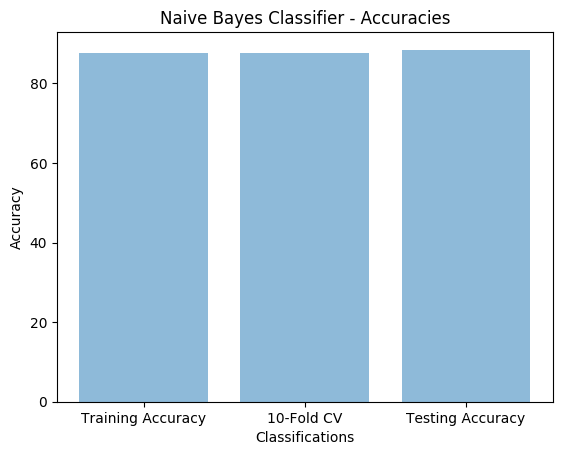

In [0]:
objects = ('Training Accuracy', '10-Fold CV', 'Testing Accuracy')
y_pos = np.arange(len(objects))
performance = [accuracy_NB,avg_NB_kfold,accu_NB]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Classifications')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Classifier - Accuracies')
 
plt.show()



In [0]:
metrics = MulticlassMetrics(labels_and_preds_NB.map(lambda x: (x["predicted"], x["actual"])))
# Overall statistics
print("\nSummary Stats_NB\n")
# Statistics by class
labels = (sc.parallelize([row[0] for row in tshuff_rdd_test.collect()])).distinct().collect()
for label in sorted(labels):
    print("Class %s precision_NB = %s" % (label, metrics.precision(label)))
    print("Class %s recall_NB = %s" % (label, metrics.recall(label)))
    print("Class %s F1 Measure_NB = %s" % (label, metrics.fMeasure(float(label), beta=1.0)))

# Weighted stats
print("\nAvg/Weighted recall_NB = %s" % metrics.weightedRecall)
print("Avg/Weighted precision_NB = %s" % metrics.weightedPrecision)
print("Avg/Weighted F(1) Score_NB = %s" % metrics.weightedFMeasure())

cm=metrics.confusionMatrix().toArray()
print("\nConfusion matrix_NB=")
print(cm)
print("\n")
metrics2 = BinaryClassificationMetrics(labels_and_preds_NB.map(lambda x: (x["predicted"], x["actual"])))

# Area under ROC curve
print("Area under ROC_NB = %s" % metrics2.areaUnderROC)

Summary Stats_NB

Class 0 precision_NB = 0.0
Class 0 recall_NB = 0.0
Class 0 F1 Measure_NB = 0.0
Class 1 precision_NB = 0.8847424042272127
Class 1 recall_NB = 1.0
Class 1 F1 Measure_NB = 0.9388470299632031

Avg/Weighted recall_NB = 0.8847424042272127
Avg/Weighted precision_NB = 0.7827691218377487
Avg/Weighted F(1) Score_NB = 0.8306377784912223

Confusion matrix_NB=
[[ 0. 349.]
 [ 0. 2679.]]


Area under ROC_NB = 0.5

# Logistic Regression and ROC curve
1) Here the Logistic Regression is used with L2 regularization for training the data testing it on the training data to obtain the TRAINING ACCURACY

2) After this the 10-fold Cross Validation is performed iteratvely to find the best classifier

3) Then training model is used and tested on the testing data to get the TEST ACCURACY

4) In addition to this we compute the Precision, Recall and F-1 Score for each label ie 1 and 0

5) We also compute the Average Precision, Recall and F-1 Score

6) The confusion matrix is also included

7) The Area under the ROC is computed

8) The ROC curve is also plotted

9) A graph which has plot of the training, 10-fold CV and test accuracy is also included

In [0]:
#######################################################
#Accuracy of Training data using train.csv itself using LG

tf_train=CompTF(rdd_train)
idf_train=CompIDF(tf_train)
tfidf_train=CompTFIDF(tf_train,idf_train)
training = Convert_to_LabeledPoint(sc.parallelize([row[0] for row in rdd_train.collect()]),tfidf_train)
model_train_LG=LG_train(training)
accuracy=test(model_train_LG,sc.parallelize([row[0] for row in rdd_train.collect()]),tfidf_train)
print ("TRAINING ACCURACY:-\n")
print("The accuracy for the training dataset tested on the training data itself using LG is",accuracy,"%")
print ("\n")




TRAINING ACCURACY:-

The accuracy for the training dataset tested on the training data itself using LG is 87.22521775197013 %

In [0]:
########################################################
# KFold LG

print ("10-FOLD CV ACCURACIES FOR ALL ITERATIONS\n")


tot_LG_kfold=0
LG_kfold_set=[]
for i in range(0,len(p)):
    test_RDD=p[i]
    train_tempRDD=sc.emptyRDD()
    for j in range(0,len(p)):
        if i!=j:
            train_tempRDD=train_tempRDD.union(p[j])
    tf_train=CompTF(train_tempRDD)
    idf_train=CompIDF(tf_train)
    tfidf_train=CompTFIDF(tf_train,idf_train)
    training = Convert_to_LabeledPoint(sc.parallelize([row[0] for row in train_tempRDD.collect()]),tfidf_train)
    model_train=LG_train(training)
    tf_test=CompTF(test_RDD)
    tfidf_test=CompTFIDF(tf_test,idf_train)
    accuracy_LG=test(model_train,sc.parallelize([row[0] for row in test_RDD.collect()]),tfidf_test)
    print ("The accuracy for number",i+1,"kth partition test for 10-fold cross validation for LG is",accuracy_LG,"%")
    tot_LG_kfold=tot_LG_kfold+accuracy
    LG_kfold_set.append(accuracy)
avg_LG_kfold=tot_LG_kfold/len(p)
LG_kfold_best=max(LG_kfold_set)
print ("\n")
print ("The average accuracy for LG after 10-fold cross validation is",avg_LG_kfold,"%")
print ("\n")
print ("The highest accuracy for LG after 10-fold cross validation is",LG_kfold_best,"%")
print ("\n")

In [0]:
#######################################################


# tshuff_rdd_test=sc.parallelize(test_shuffle)
tshuff_rdd_test = rdd_test
tshuff_rdd_train= rdd_train
tf_test=CompTF(tshuff_rdd_test)
tf_train=CompTF(tshuff_rdd_train)
idf_train=CompIDF(tf_train)
tfidf_test=CompTFIDF(tf_test,idf_train)



labels_and_preds_LG,accu_LG = test_final(model_train_LG,sc.parallelize([row[0] for row in tshuff_rdd_test.collect()]),tfidf_test)
print ("\nTEST ACCURACY:-\n")
print("The accuracy of prediction for LG on testing data is",accu_LG,"%")
print ("\n")



TEST ACCURACY:-

The accuracy of prediction for LG on testing data is 88.01188903566711 %

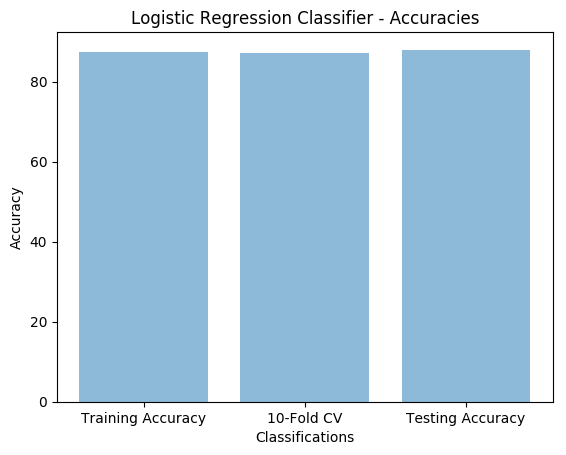

In [0]:
objects = ('Training Accuracy', '10-Fold CV', 'Testing Accuracy')
y_pos = np.arange(len(objects))
performance = [accuracy_LG,avg_LG_kfold,accu_LG]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Classifications')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Classifier - Accuracies')
 
plt.show()

In [0]:
#############################################################################################
# Statistics by class
print("\nSummary Stats_LG\n")
labels = (sc.parallelize([row[0] for row in tshuff_rdd_test.collect()])).distinct().collect()
for label in sorted(labels):
    print("Class %s precision_LG = %s" % (label, metrics.precision(label)))
    print("Class %s recall_LG = %s" % (label, metrics.recall(label)))
    print("Class %s F1 Measure_NB = %s" % (label, metrics.fMeasure(float(label), beta=1.0)))

# Weighted stats
print("\n\nAvg/Weighted recall_LG = %s" % metrics.weightedRecall)
print("Avg/Weighted precision_LG = %s" % metrics.weightedPrecision)
print("Avg/Weighted F(1) Score_LG = %s" % metrics.weightedFMeasure())

cm=metrics.confusionMatrix().toArray()
print("\nConfusion matrix_LG=")
print(cm)
print("\n\n")

metrics2 = BinaryClassificationMetrics(labels_and_preds_LG.map(lambda x: (x["predicted"], x["actual"])))




Summary Stats_LG

Class 0 precision_LG = 0.0
Class 0 recall_LG = 0.0
Class 0 F1 Measure_NB = 0.0
Class 1 precision_LG = 0.8847424042272127
Class 1 recall_LG = 1.0
Class 1 F1 Measure_NB = 0.9388470299632031


Avg/Weighted recall_LG = 0.8847424042272127
Avg/Weighted precision_LG = 0.7827691218377487
Avg/Weighted F(1) Score_LG = 0.8306377784912223

Confusion matrix_LG=
[[ 0. 349.]
 [ 0. 2679.]]

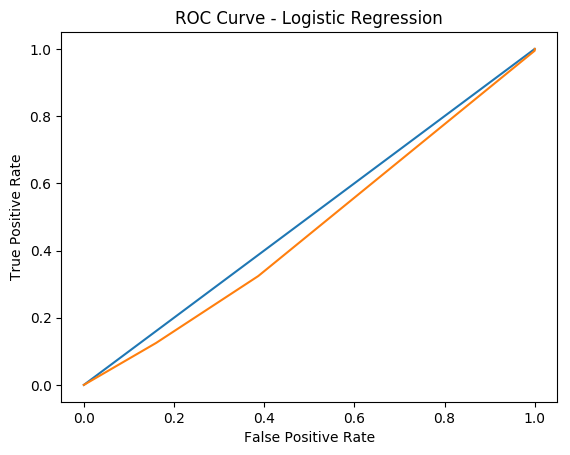

In [0]:

################################################################################################
# For ROC curve

model_train_LG.setThreshold(0.25)

labels_and_preds_LG2,accu_LG2 = test_final(model_train_LG,sc.parallelize([row[0] for row in tshuff_rdd_test.collect()]),tfidf_test)

model_train_LG.setThreshold(0.75)
labels_and_preds_LG3,accu_LG3 = test_final(model_train_LG,sc.parallelize([row[0] for row in tshuff_rdd_test.collect()]),tfidf_test)


model_train_LG.setThreshold(0.1)

labels_and_preds_LG4,accu_LG4 = test_final(model_train_LG,sc.parallelize([row[0] for row in tshuff_rdd_test.collect()]),tfidf_test)


model_train_LG.setThreshold(0.9)

labels_and_preds_LG5,accu_LG5 = test_final(model_train_LG,sc.parallelize([row[0] for row in tshuff_rdd_test.collect()]),tfidf_test)


tpr,fpr=tf(labels_and_preds_LG) 
tpr2,fpr2=tf(labels_and_preds_LG2) 
tpr3,fpr3=tf(labels_and_preds_LG3)
tpr4,fpr4=tf(labels_and_preds_LG4) 
tpr5,fpr5=tf(labels_and_preds_LG5) 

x = [0,fpr5,fpr3,fpr,fpr2,fpr4,1]
y = [0,tpr5,tpr3,tpr,tpr2,tpr4,1]

# This is the ROC curve
x1=[0,1]
y1=[0,1]
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.plot(x1,y1)
plt.plot(x,y)



plt.show()

In [0]:
################################################################################################
model_train_LG.clearThreshold()

labels_and_probs_LG=test_wpp(model_train_LG,sc.parallelize([row[0] for row in tshuff_rdd_test.collect()]),tfidf_test)

metrics = MulticlassMetrics(labels_and_preds_LG.map(lambda x: (x["predicted"], x["actual"])))


# Area under ROC curve
print("Area under ROC_LG = %s" % metrics2.areaUnderROC)

Area under ROC_LG = 0.4973870847331094

# Decision Tree Learning
1) Here the Decision Tree Learning classifier is used for training the data testing it on the training data to obtain the TRAINING ACCURACY

2) After this the 10-fold Cross Validation is performed iteratvely to find the best classifier

3) Then training model is used and tested on the testing data to get the TEST ACCURACY

4) In addition to this we compute the Precision, Recall and F-1 Score for each label ie 1 and 0

5) We also compute the Average Precision, Recall and F-1 Score

6) The confusion matrix is also included

7) The Area under the ROC is computed

8) A graph which has plot of the training, 10-fold CV and test accuracy is also included

In [0]:
#Accuracy of Training data using train.csv itself using DT
#print (test_shuffle)
tf_train=CompTF_withNumFeatures(rdd_train)
idf_train=CompIDF(tf_train)
tfidf_train=CompTFIDF(tf_train,idf_train)
training = Convert_to_LabeledPoint(sc.parallelize([row[0] for row in rdd_train.collect()]),tfidf_train)
model_train_DT=DT_train(training)
accuracy_DT=test(model_train_DT,sc.parallelize([row[0] for row in rdd_train.collect()]),tfidf_train)
print ("TRAINING ACCURACY:-\n")
print("The accuracy for the training dataset tested on the training data itself using DT is",accuracy_DT,"%")
print("\n")



TRAINING ACCURACY:-

The accuracy for the training dataset tested on the training data itself using DT is 87.9026683257293 %

In [0]:
########################################################
# KFold DT
print ("10-FOLD CV ACCURACIES FOR ALL ITERATIONS\n")

tot_DT_kfold=0
DT_kfold_set=[]
for i in range(0,len(p)):
    test_RDD=p[i]
    train_tempRDD=sc.emptyRDD()
    for j in range(0,len(p)):
        if i!=j:
            train_tempRDD=train_tempRDD.union(p[j])
    tf_train=CompTF_withNumFeatures(train_tempRDD)
    idf_train=CompIDF(tf_train)
    tfidf_train=CompTFIDF(tf_train,idf_train)
    training = Convert_to_LabeledPoint(sc.parallelize([row[0] for row in train_tempRDD.collect()]),tfidf_train)
    model_train = DT_train(training)
    tf_test = CompTF_withNumFeatures(test_RDD)
    tfidf_test = CompTFIDF(tf_test,idf_train)
    accuracy=test(model_train,sc.parallelize([row[0] for row in test_RDD.collect()]),tfidf_test)
    print ("The accuracy for number",i+1,"kth partition test for 10-fold cross validation for DT is",accuracy,"%")
    tot_DT_kfold=tot_DT_kfold+accuracy
    DT_kfold_set.append(accuracy)
avg_DT_kfold=tot_DT_kfold/len(p)
DT_kfold_best=max(DT_kfold_set)
print("\n")
print ("The average accuracy for DT after 10-fold cross validation is",avg_DT_kfold,"%")
print("\n")
print ("The highest accuracy for DT after 10-fold cross validation is",DT_kfold_best,"%")
print("\n")
    


10-FOLD CV ACCURACIES FOR ALL ITERATIONS

The accuracy for number 1 kth partition test for 10-fold cross validation for DT is 84.01697312588402 %
The accuracy for number 2 kth partition test for 10-fold cross validation for DT is 86.83068017366136 %
The accuracy for number 3 kth partition test for 10-fold cross validation for DT is 85.93103448275862 %
The accuracy for number 4 kth partition test for 10-fold cross validation for DT is 85.36912751677852 %
The accuracy for number 5 kth partition test for 10-fold cross validation for DT is 87.23118279569893 %
The accuracy for number 6 kth partition test for 10-fold cross validation for DT is 88.96551724137932 %
The accuracy for number 7 kth partition test for 10-fold cross validation for DT is 87.93342579750347 %
The accuracy for number 8 kth partition test for 10-fold cross validation for DT is 89.08355795148249 %
The accuracy for number 9 kth partition test for 10-fold cross validation for DT is 88.32853025936599 %
The accuracy for number 10 kth partition test for 10-fold cross validation for DT is 87.41542625169147 %


The average accuracy for DT after 10-fold cross validation is 87.11054555962042 %


The highest accuracy for DT after 10-fold cross validation is 89.08355795148249 %

In [0]:
################################################

# tshuff_rdd_test=sc.parallelize(test_shuffle)
tshuff_rdd_test = rdd_test
tshuff_rdd_train= rdd_train
tf_test=CompTF_withNumFeatures(tshuff_rdd_test)
tf_train=CompTF_withNumFeatures(tshuff_rdd_train)
idf_train=CompIDF(tf_train)
tfidf_test=CompTFIDF(tf_test,idf_train)



labels_and_preds_DT,accu_DT = test_final(model_train_DT,sc.parallelize([row[0] for row in tshuff_rdd_test.collect()]),tfidf_test)

print ("\nTEST ACCURACY:-\n")
print("The accuracy of prediction for DT on testing data is",accu_DT,"%")
print("\n")



TEST ACCURACY:-

The accuracy of prediction for DT on testing data is 88.21003963011889 %

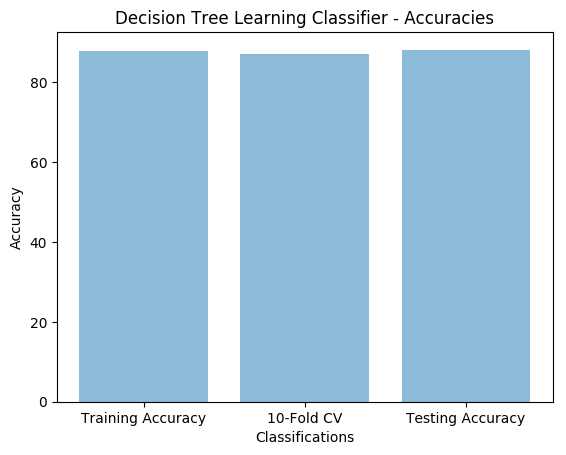

In [0]:
objects = ('Training Accuracy', '10-Fold CV', 'Testing Accuracy')
y_pos = np.arange(len(objects))
performance = [accuracy_DT,avg_DT_kfold,accu_DT]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Classifications')
plt.ylabel('Accuracy')
plt.title('Decision Tree Learning Classifier - Accuracies')
 
plt.show()


In [0]:
# Overall statistics
metrics = MulticlassMetrics(labels_and_preds_DT.map(lambda x: (x["predicted"], x["actual"])))
print("\nSummary Stats_D\n")


# Statistics by class
labels = (sc.parallelize([row[0] for row in tshuff_rdd_test.collect()])).distinct().collect()
for label in sorted(labels):
    print("Class %s precision_DT = %s" % (label, metrics.precision(label)))
    print("Class %s recall_DT = %s" % (label, metrics.recall(label)))
    print("Class %s F1 Measure_DT = %s" % (label, metrics.fMeasure(float(label), beta=1.0)))

# Weighted stats
print("\n\nAvg/Weighted recall_DT = %s" % metrics.weightedRecall)
print("Avg/Weighted precision_DT = %s" % metrics.weightedPrecision)
print("Avg/Weighted F(1) Score_DT = %s" % metrics.weightedFMeasure())

cm=metrics.confusionMatrix().toArray()
print("\nConfusion matrix_DT=")
print(cm)

Summary Stats_D

Class 0 precision_DT = 0.0
Class 0 recall_DT = 0.0
Class 0 F1 Measure_DT = 0.0
Class 1 precision_DT = 0.8844370860927152
Class 1 recall_DT = 0.9970138111235536
Class 1 F1 Measure_DT = 0.937357431128268


Avg/Weighted recall_DT = 0.8821003963011889
Avg/Weighted precision_DT = 0.7824989939373791
Avg/Weighted F(1) Score_DT = 0.8293198672366677

Confusion matrix_DT=
[[ 0. 349.]
 [ 8. 2671.]]

# Best Classifier

The best Classifier is calculated by finding the maximum out of the average and highest in the 10-fold Cross Validation.

# Fetching Tweets

Then after determining the best classifier we output the prediction probabilitioes and the corresponding tweet for Correctly and Incorrectly predicted label for tweets

# 20 Most Informative Features

For this part of the HW we have implemented 2 methods which are:-

1) We have used ChiSqSelector which is an inbuilt function of mllib, but this returns only hashed values

2) The next method involves, counting the features available in the training set and computing the number of 1's and 0's, then compute the weighted total of the numbers and then sort it in descending order and output the 20 most informative features